# Pie Chart (Pasta Grafiği)

Pie Chart bir veri setindeki bir yüzdesel olarak dağılımı göstermek için kullanılır. Veri seti içerisindeki bir kolona göre değerlerin toplam içerisindeki payını görmek için oldukça elverişli bir yöntemdir.

Bir dataframe üzerinden Pie Chart çizdirmek için <code>df.plot(kind="pie")</code> kullanılır.

Örnekte kullandığımız veri setine ulaşmak için:

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

Pie Chart çalışması için örneğimizdeki yıllar boyunca toplam göçmen sayısının kıtalara göre dağılımını inceleyelim. Bu işlem için elimizdeki dataframe üzerinde gruplama çalışması yapmamız gerekiyor. Önceliki olarka verimize bakalım.

In [4]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Bu veriyi Continent kolonuna göre gruplamamız gerekiyor. Bunun için pandas içerisindeki <code>df.groupby()</code> metodunu kullanacağız. ***groupby*** metodu 3 adımdan oluşur.

* ***Split***: Verilerin verilen kriter yada kriterlere göre ayrılması işlemi yapılır
* ***Apply***: Oluşturulan her bir gruba ayrı ayrı aşağıdaki fonksiyonlardan biri yada bir kaçı uygulanır.
    * sum() (Toplam)
    * count() (Adet)
    * mean() (Ortalama)
    * std() (Standart Sapma)
    * agg() (min, max gibi değerlerin hesaplamasını yapar)
    * vb..
* ***Combine***: Oluşturulmuş bu ayrı veriler bir bir dataset içerisinde birleştirilir.
    

In [5]:
# Elimizdeki veriyi Continent - Kıta kolonunan göre gruplayıp sum() ile sayılar değer içeren kolonların toplayacağız.
# Bu toplamdan df_continents adında yeni bir dataframe yaratacağız.
df_continents=df_can.groupby("Continent",axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Oluşturduğumuz bu verinin grafiğini çizdirmek için <code>kind="pie"</code> parameteresini aşağıdaki parametreler ile birlikte kullanacağız:
- `autopct` -  grafikteki parçaların içerisine konulacak sayısal değerlerinin biçimini belirlemeye işlevnin görür, etiketin biçimi şu şekilde olacaktır. `fmt%pct`.
- `startangle` - grafiğin başlangıç noktasını x ekseninden saat yönünün tersine olacak şekilde verilen derece kadar döndürülmesini sağlar.
- `shadow` - grafiğin altına bir gölge ekler.

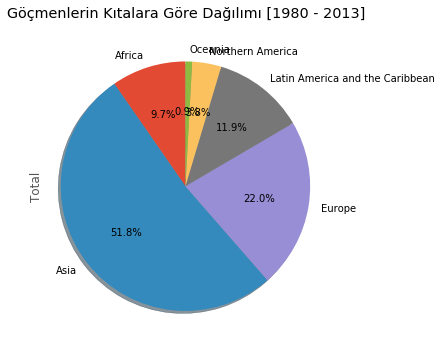

In [6]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # yüzde kaça karşılık geldiğini gösterir
                            startangle=90,     # başlangıç açısını verir (Africa)
                            shadow=True,       # gölge ekler     
                            )

plt.title("Göçmenlerin Kıtalara Göre Dağılımı [1980 - 2013]")
plt.axis('equal') # Grafiğin daire gibi görülmesini sağlar.

plt.show()

Yukarıdaki grafik çok okunaklı ve güzel olmadı. Daha okunaklı ve güzel olması için aşağıdaki değişiklikleri yapalım:

* Grafiğin üzerindeki veri etiketlerini <code>labels=None</code> ile kaldırıp `plt.legend()`ile bu etiketlerin ayrı bir blok içinde gözükmesini sağlayalım.
* Yüzde kaça karşılık geldiğini gösteren yazıları grafiğin içinde değil dışında göstermek için `pctdistance` parameteresini kullanalım.
* Kendi seçeceğimiz renk paleti için `colors` parameteresini kullanalım.
* Çok düşün orana sahip kıtaların görünebilmesi için grafiğin biraz dışında görünebilmelerini sağlamak için  (Africa, North America, ve Latin America and Carribbean)  `explode` parameteresini kullanalım.

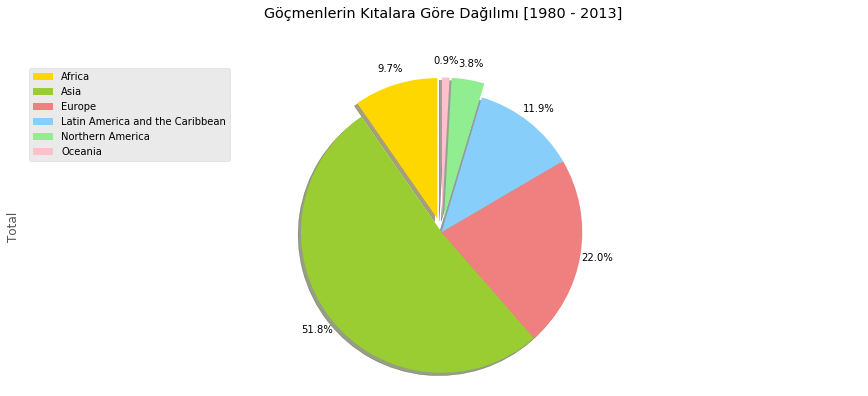

In [7]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # grafik üzerindeki yazıları kaldırır
                            pctdistance=1.12,    # her pasta diliminin üzerindeki yazının pastanın merkezine göre oranı 
                            colors=colors_list, 
                            explode=explode_list # en düşük 3 kıtanın dışarıda görünmesini sağlar.
                            )

# y=1.12 ile başlık pctdistance ile eşleştirilerek %12 uzaklaştırılır.
plt.title("Göçmenlerin Kıtalara Göre Dağılımı [1980 - 2013]", y=1.12) 

plt.axis('equal') 

# etiketlerin ayrı bir blok içerisinde görünmesi sağlanır. 
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()